<!-- WARNING: THIS FILE WAS AUTOGENERATED! DO NOT EDIT! -->

## Reading raw input

Input can be read from three different files formats:

* `.raw` files describing `Thermo` raw data.
* `.d` folders describing `Bruker` raw data.
* `.mzML` files describing generic input.

All reading functions return a `query_data` dictionary similar to the following structure:

```
query_data = {
    "scan_list_ms1":   np.array(...)
    "rt_list_ms1":     np.array(...)
    "mass_list_ms1":   np.array(...)
    "int_list_ms1":    np.array(...)
    "ms_list_ms1":     np.array(...)
    "scan_list_ms2":   np.array(...)
    "rt_list_ms2":     np.array(...)
    "mass_list_ms2":   mass_list_ms2
    "int_list_ms2":    int_list_ms2
    "ms_list_ms2":     np.array(...)
    "prec_mass_list2": np.array(...)
    "mono_mzs2":       np.array(...)
    "charge2":         np.array(...)
}
```

### Thermo

To read Thermo files, AlphaPept uses the `pyrawfilereader` package, a Python implementation of the commonly used `rawfilereader` tool. By using the custom python version, Thermo files can be read without having to install `MSFileReader`.

The user can pass an additional flag `use_profile_ms1`. This will then use the profile data which is not centroided already an peform centroiding. Note that this will lead to slightly different intensities, as the centroided data uses the apex and the centroid algorithm the summed intensity.

In [1]:
#| echo: false
#| output: asis
show_doc(load_thermo_raw)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L10){target="_blank" style="float:right; font-size:smaller"}

### load_thermo_raw

>      load_thermo_raw (raw_file_name:str, n_most_abundant:int,
>                       use_profile_ms1:bool=False, callback:<built-
>                       infunctioncallable>=None)

Load raw thermo data as a dictionary.

Args:
    raw_file_name (str): The name of a Thermo .raw file.
    n_most_abundant (int): The maximum number of peaks to retain per MS2 spectrum.
    use_profile_ms1 (bool): Use profile data or centroid it beforehand. Defaults to False.
    callback (callable): A function that accepts a float between 0 and 1 as progress. Defaults to None.

Returns:
    tuple: A dictionary with all the raw data and a string with the acquisition_date_time

### Bruker

To access Bruker files, AlphaPept relies on the external `timsdata` library from Bruker (available in the `alphatims\ext` folder, licenses are applicable). Unfortunately, these libraries are only available on Windows and Linux. As a result, the reading of raw data is not available on macOS. However, once raw data is converted to `.ms_data.hdf` output, other workflow steps (besides feature feating) are possible without problems on macOS.

In [2]:
#| echo: false
#| output: asis
show_doc(load_bruker_raw)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L134){target="_blank" style="float:right; font-size:smaller"}

### load_bruker_raw

>      load_bruker_raw (d_folder_name:str, n_most_abundant:int, callback:<built-
>                       infunctioncallable>=None, **kwargs)

Load raw Bruker data as a dictionary.

Args:
    d_folder_name (str): The name of a Bruker .d folder.
    n_most_abundant (int): The maximum number of peaks to retain per MS2 spectrum.
    callback (callable): A function that accepts a float between 0 and 1 as progress. Defaults to None.

Returns:
    tuple: A dictionary with all the raw data and a string with the acquisition_date_time

For `ccs` (i.e., ion mobility) values, we need additional functions from the Bruker library. As the live feature-finder might not be able to determine some charge values, it is intended to perform this calculation at a later stage once we have charge values from the post-processing feature finder.

In [3]:
#| echo: false
#| output: asis
show_doc(one_over_k0_to_CCS)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L212){target="_blank" style="float:right; font-size:smaller"}

### one_over_k0_to_CCS

>      one_over_k0_to_CCS (one_over_k0s:numpy.ndarray, charges:numpy.ndarray,
>                          mzs:numpy.ndarray)

Retrieve collisional cross section (CCS) values from (mobility, charge, mz) arrays.

Args:
    one_over_k0s (np.ndarray): The ion mobilities (1D-np.float).
    charges (np.ndarray): The charges (1D-np.int).
    mzs (np.ndarray): The mz values (1D-np.float).

Returns:
    np.ndarray: The CCS values.

Due to availbility of Bruker libraries, this can only be tested on Windows and Linux.

### Generic `.mzML` files

To access `.mzML` files, we rely on the `pyteomics` package. For using an mzml format for performing a search, Peak Picking (data centroiding) should be applied to all MS levels of the data.

In [4]:
#| echo: false
#| output: asis
show_doc(load_mzml_data)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L286){target="_blank" style="float:right; font-size:smaller"}

### load_mzml_data

>      load_mzml_data (filename:str, n_most_abundant:int, callback:<built-
>                      infunctioncallable>=None, **kwargs)

Load data from an mzml file as a dictionary.

Args:
    filename (str): The name of a .mzml file.
    n_most_abundant (int): The maximum number of peaks to retain per MS2 spectrum.
    callback (callable): A function that accepts a float between 0 and 1 as progress. Defaults to None.

Returns:
    tuple: A dictionary with all the raw data, a string with the acquisition_date_time and a string with the vendor.

In [5]:
#| echo: false
#| output: asis
show_doc(extract_mzml_info)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L257){target="_blank" style="float:right; font-size:smaller"}

### extract_mzml_info

>      extract_mzml_info (input_dict:dict)

Extract basic MS coordinate arrays from a dictionary.

Args:
    input_dict (dict): A dictionary obtained by iterating over a Pyteomics mzml.read function.

Returns:
    tuple: The rt, masses, intensities, ms_order, prec_mass, mono_mz, charge arrays retrieved from the input_dict.
        If the `ms level` in the input dict does not equal 2, the charge, mono_mz and prec_mass will be equal to 0.

In [6]:
#| echo: false
#| output: asis
show_doc(check_sanity)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L241){target="_blank" style="float:right; font-size:smaller"}

### check_sanity

>      check_sanity (mass_list:numpy.ndarray)

Sanity check for mass list to make sure the masses are sorted.

Args:
    mass_list (np.ndarray): The mz values (1D-np.float).

Raises:
    ValueError: When the mz values are not sorted.

## Reading other files

Benchmarking proteomics software against each other is not straightforward as various naming conventions exist and different algorithms are implemented. In this section, we define some helper functions that allow us to read results from other tools and facilitate the comparison of different tools against AlphaPept.

### Reading MaxQuant .xml settings file

One of the most commonly used tools to analyze MS data is MaxQuant. AlphaPept reads MaxQuant .xml files as follows:

In [7]:
#| echo: false
#| output: asis
show_doc(extract_mq_settings)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L438){target="_blank" style="float:right; font-size:smaller"}

### extract_mq_settings

>      extract_mq_settings (path:str)

Function to return MaxQuant values as a dictionary for a given xml file.

Args:
    path (str): File name of an xml file.

Returns:
    dict: A dictionary with MaxQuant info.

Raises:
    ValueError: When path is not a valid xml file.

In [ ]:
mq_dict = extract_mq_settings('../testfiles/test_mqpar.xml')
mq_dict['fastaFiles']

{'FastaFileInfo': {'fastaFilePath': 'testfile.fasta',
  'identifierParseRule': '>([^\\s]*)',
  'descriptionParseRule': '>(.*)',
  'taxonomyParseRule': None,
  'variationParseRule': None,
  'modificationParseRule': None,
  'taxonomyId': None}}

AlphaPept incorporates PTMs directly in amino acid sequences with lower case identifiers. Parsing MaxQuant sequences with PTMs is done with:

In [8]:
#| echo: false
#| output: asis
show_doc(parse_mq_seq)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L466){target="_blank" style="float:right; font-size:smaller"}

### parse_mq_seq

>      parse_mq_seq (peptide:str)

Replaces maxquant convention to alphapept convention.

ToDo: include more sequences

Args:
    peptide (str): A peptide sequence from MaxQuant.

Returns:
    str: A parsed peptide sequence compatible with AlphaPept.

A quick test shows the results are correct:

In [ ]:
parse_mq_seq('_AFQPFFVELTM(Oxidation (M))PYSVIR_')

'AFQPFFVELToxMPYSVIR'

## Preprocessing data

Raw data needs to be preprocessed to simplify it for AlphaPept analysis. Currently, this requires:

* Profiling of the data
* Trimming of spectra to retain only the 'n'-most intense peaks

### Centroiding profile data

Importing raw data frequently results in profile data. When having profile data, Alphapept first needs to perform centroiding to use this data properly. For this, it needs to search local maxima ("peaks") of the intensity as a function of m/z. For this AlphaPept uses the function [`get_peaks`](https://mannlabs.github.io/alphapept/io.html#get_peaks). A peak is described by three points, the `start` of the peak, the `center`, and the `end`. The function accepts an intensity array and calculates the delta (gradient) between consecutive data points to determine the start, center, and end.

In [9]:
#| echo: false
#| output: asis
show_doc(get_peaks)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L491){target="_blank" style="float:right; font-size:smaller"}

### get_peaks

>      get_peaks (int_array:numpy.ndarray)

Detects peaks in an array.

Args:
    int_array (np.ndarray): An array with intensity values.

Returns:
    list: A regular Python list with all peaks.
        A peak is a triplet of the form (start, center, end)

A quick test to illustrate the function:

In [ ]:
int_array = np.array([0,0,0,1,2,3,3,2,1,0,0,1,2,3,2,1,0])
get_peaks(int_array)

[(2, 6, 9), (9, 13, 16)]

To determine the center of the peak, we distinguish based on the number of raw data points that are contained in the peak:

* One data point: m/z value of this point is taken as the center
* Two datapoints: Average of the two m/z values, weighted by the intensities
* Three or more data points: Gaussian estimation of the center position.

For the Gaussian estimation, only the three central points are used to fit a Gaussian Peak shape. The Gaussian is then approximated with the logarithm. 

The gaussian estimator is defined in [`gaussian_estimator`](https://mannlabs.github.io/alphapept/io.html#gaussian_estimator) and is used by the wrapper [`get_centroid`](https://mannlabs.github.io/alphapept/io.html#get_centroid).

In [10]:
#| echo: false
#| output: asis
show_doc(gaussian_estimator)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L573){target="_blank" style="float:right; font-size:smaller"}

### gaussian_estimator

>      gaussian_estimator (peak:tuple, mz_array:numpy.ndarray,
>                          int_array:numpy.ndarray)

Three-point gaussian estimator.

Args:
    peak (tuple): A triplet of the form (start, center, end)
    mz_array (np.ndarray): An array with mz values.
    int_array (np.ndarray): An array with intensity values.

Returns:
    float: The gaussian estimate of the center.

In [11]:
#| echo: false
#| output: asis
show_doc(get_centroid)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L540){target="_blank" style="float:right; font-size:smaller"}

### get_centroid

>      get_centroid (peak:tuple, mz_array:numpy.ndarray,
>                    int_array:numpy.ndarray)

Wrapper to estimate centroid center positions.

Args:
    peak (tuple): A triplet of the form (start, center, end)
    mz_array (np.ndarray): An array with mz values.
    int_array (np.ndarray): An array with intensity values.

Returns:
    tuple: A tuple of the form (center, intensity)

The function performs as expected:

In [ ]:
int_array = np.array([0,0,0,1,2,3,3,2,1,0,0,1,2,3,2,1,0])
mz_array = np.array([0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])
peak = (2, 6, 9)

print(gaussian_estimator(peak, mz_array, int_array))
print(get_centroid(peak, mz_array, int_array))

4.499999999999999
(4.499999999999999, 12)


The detected centroid can also easily be visualized:

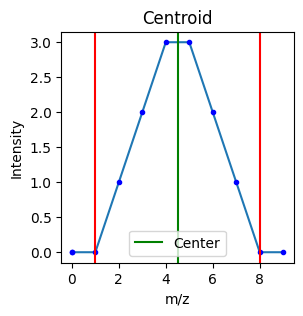

In [ ]:
import matplotlib.pyplot as plt


def plot_centroid(peak, mz_array, int_array):

    plt.figure(figsize=(3, 3))

    start, center, end = peak

    centroid = get_centroid((start, center, end), mz_array, int_array)

    plt.plot(mz_array[start - 2 : end + 2], int_array[start - 2 : end + 2])
    plt.plot(mz_array[start - 2 : end + 2], int_array[start - 2 : end + 2], "b.")
    plt.axvline(mz_array[start], color="r")
    plt.axvline(mz_array[end], color="r")

    plt.axvline(centroid[0], color="g", label='Center')
    plt.title("Centroid")
    plt.xlabel("m/z")
    plt.ylabel("Intensity")
    plt.legend()

    plt.show()
    
int_array = np.array([0,0,0,1,2,3,3,2,1,0,0,1,2,3,2,1,0])
mz_array = np.array([0,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15])

peak = (2, 6, 9)
    
plot_centroid(peak, mz_array, int_array)

In [12]:
#| echo: false
#| output: asis
show_doc(centroid_data)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L610){target="_blank" style="float:right; font-size:smaller"}

### centroid_data

>      centroid_data (mz_array:numpy.ndarray, int_array:numpy.ndarray)

Estimate centroids and intensities from profile data.

Args:
    mz_array (np.ndarray): An array with mz values.
    int_array (np.ndarray): An array with intensity values.

Returns:
    tuple: A tuple of the form (mz_array_centroided, int_array_centroided)

### Trimming spectra to retain the `n` most intense peaks

[`get_most_abundant`](https://mannlabs.github.io/alphapept/io.html#get_most_abundant): In order to save spectra in a more memory-efficient form, we only keep the n most abundant peaks. This allows us to save data in a fast, accessible matrix format. 

[`get_local_intensity`](https://mannlabs.github.io/alphapept/io.html#get_local_intensity): This calculates the local intensity to get local maxima.

In [13]:
#| echo: false
#| output: asis
show_doc(get_most_abundant)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L668){target="_blank" style="float:right; font-size:smaller"}

### get_most_abundant

>      get_most_abundant (mass:numpy.ndarray, intensity:numpy.ndarray,
>                         n_max:int, window:int=10)

Returns the n_max most abundant peaks of a spectrum.

Args:
    mass (np.ndarray): An array with mz values.
    intensity (np.ndarray): An array with intensity values.
    n_max (int): The maximum number of peaks to retain.
        Setting `n_max` to -1 returns all peaks.
    window (int): Use local maximum in a window

Returns:
    tuple: the filtered mass and intensity arrays.

In [14]:
#| echo: false
#| output: asis
show_doc(get_local_intensity)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L648){target="_blank" style="float:right; font-size:smaller"}

### get_local_intensity

>      get_local_intensity (intensity, window=10)

Calculate the local intensity for a spectrum.

Args:
    intensity (np.ndarray): An array with intensity values.
    window (int): Window Size
Returns:
    nop.ndarray: local intensity

For saving, we are currently relying on the hdf-container (see below).

While we could, in principle, store the mz and int arrays as a list of variable length, this will come at a performance decrease. We, therefore, create an array of the dimensions of the n most abundant peaks and the number of spectra with the function [`list_to_numpy_f32`](https://mannlabs.github.io/alphapept/io.html#list_to_numpy_f32) and fill the unoccupied cells with `-1`. This allows an increase in accessing times at the cost of additional disk space.

In [15]:
#| echo: false
#| output: asis
show_doc(list_to_numpy_f32)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L703){target="_blank" style="float:right; font-size:smaller"}

### list_to_numpy_f32

>      list_to_numpy_f32 (long_list:list)

Function to convert a list to np.float32 array.

Args:
    long_list (list): A regular Python list with values that can be converted to floats.

Returns:
    np.ndarray: A np.float32 array.

## Saving output

As MS hardware has continued to improve over the years, MS data has become more complex. To deal with this complexity, the MS community has already used many different [data formats](https://onlinelibrary.wiley.com/doi/full/10.1002/mas.21522) to store and access data. [HDF](https://www.hdfgroup.org/solutions/hdf5/) containers are one option, but they have not yet gained widespread support.

### HDF containers in general

In general, an HDF container can be viewed as a compressed folder with metadata (i.e., attributes) associated to each single subfolder or file (i.e., data arrays of various types and sizes) within this container. A container might, for instance have contents that look like, e.g.:
```
HDF_Container
    {
        meta_data_1: "Some string",
        meta_data_2: 1234567890,
        ...
    }
    array_1
        {
            meta_data_of_array1_1: "Some other string",
            ...
        },
        100x2 int8
    array_2
        1000x2 float64
    subfolder_1
        {
            meta_data_of_subfolder_1_1: "Really any string of any length",
            ...
        }
        array_1_of_subfolder_1
        subfolder_1_1
        ...
    subfolder_n
    ...
```


A few of the advantages of HDF are, e.g.:

* It has no upper limit with regards to file size
* It can be used on disk without consuming RAM memory
* It is fully portable on different machines and systems
* It is capable of fast IO operations
* It allows data to be structured very transparent while still providing a flexible way to store metadata
* ...

For these reasons, HDF containers have gained popularity in several scientific fields, including (astro)physics and geology. It is, therefore, no surprise that Python has excellent support for HDF containers. The two most used packages are `h5py` and `tables`, where the former has a generic API and the second is frequently used with `pandas` dataframes. An excellent viewer for HDF files is [HDF Compass](https://support.hdfgroup.org/projects/compass/).

### Using HDF containers in AlphaPept

AlphaPept uses the python `h5py` package to store MS data in HDF containers, inspired by the [ion_networks](https://github.com/swillems/ion_networks) repository.

* First, a generic class is defined that will serve as an API for HDF containers. To ensure full transparency, this will include immutable metadata such as `creation time`, `original_file_name` and `version`.
* The constructor of an HDF_File will be passed the `file_name` of an HDF container, an `is_read_only` flag, an `is_overwritable` flag and `is_new_file` flag.
* To compare HDF_Files, several (magic) functions need to be defined.
* Traceability and reproducibility are ensured by storing a `last_updated` and a `check` function to warn users about potential compatibility issues.

In [16]:
#| echo: false
#| output: asis
show_doc(HDF_File)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L734){target="_blank" style="float:right; font-size:smaller"}

### HDF_File

>      HDF_File (file_name:str, is_read_only:bool=True, is_new_file:bool=False,
>                is_overwritable:bool=False)

A generic class to store and retrieve on-disk
data with an HDF container.

Contents of HDF containers come in three variants:

1. `Groups`: folders
2. `Datasets`: arrays
3. `Attributes`: metadata associated with individual datasets or groups (with the root folder also considered as a normal group)

These contents can be accessed with `read` and `write` functions.

In [17]:
#| echo: false
#| output: asis
show_doc(HDF_File.write)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1005){target="_blank" style="float:right; font-size:smaller"}

### HDF_File.write

>      HDF_File.write (value, group_name:str=None, dataset_name:str=None,
>                      attr_name:str=None, overwrite:bool=None,
>                      dataset_compression:str=None, swmr:bool=False)

Write a `value` to an HDF_File.

Args:
    value (type): The name of the data to write.
        If the `value` is pd.DataFrame, a `dataset_name` must be provided.
    group_name (str): The group where to write data.
        If no `group_name` is provided, write directly to the root group.
        Defaults to None.
    dataset_name (str): If no `dataset_name` is provided,
        create a new group with `value` as name.
        The dataset where to write data. Defaults to None.
    attr_name (str): The attr where to write data. Defaults to None.
    overwrite (bool): Overwrite pre-existing data and truncate existing groups.
        If the False, ignore the is_overwritable flag of this HDF_File.
        Defaults to None.
    dataset_compression (str): The compression type to use for datasets.
        Defaults to None.
    swmr (bool): Open files in swmr mode. Defaults to False.

Raises:
    IOError: When the object is read-only.
    KeyError: When the group_name or attr_name does not exist.
    ValueError: When trying to overwrite something while overwiting is disabled.

In [18]:
#| echo: false
#| output: asis
show_doc(HDF_File.read)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L871){target="_blank" style="float:right; font-size:smaller"}

### HDF_File.read

>      HDF_File.read (group_name:str=None, dataset_name:str=None,
>                     attr_name:str=None, return_dataset_shape:bool=False,
>                     return_dataset_dtype:bool=False,
>                     return_dataset_slice:slice=slice(None, None, None),
>                     swmr:bool=False)

Read contents of an HDF_File.

Args:
    group_name (str): The group_name from where to read data.
        If no `group_name` has been provided, read directly from the root group.
        Defaults to None.
    dataset_name (str): The dataset to read.
        If no `dataset_name` has been provided, read directly from the group.
        If the `dataset_name` refers to a group, it is assumed to be
        pd.DataFrame and returned as such.
        Defaults to None.
    attr_name (str): The attribute to read.
        If `attr_name` is not None, read the attribute value instead of the contents of a group or dataset.
        If `attr_name` == "", read all attributes as a dict.
        Defaults to None.
    return_dataset_shape (bool): Do not read complete dataset to minimize RAM and IO usage.
        Defaults to False.
    return_dataset_dtype (bool): Do not read complete dataset to minimize RAM and IO usage.
        Defaults to False.
    return_dataset_slice (slice): Do not read complete dataset to minimize RAM and IO usage.
        Defaults to slice(None).
    swmr (bool): Use swmr mode to read data. Defaults to False.

Returns:
    type: Depending on what is requested, a dict, value, np.ndarray or pd.dataframe is returned.

Raises:
    KeyError: When the group_name does not exist.
    KeyError: When the attr_name does not exist in the group or dataset.
    KeyError: When the dataset_name does not exist in the group.
    ValueError: When the requested dataset is not a np.ndarray or pd.dataframe.

Unit tests for this generic HDF class include:

* Creation and truncation of files with various access.
* Writing and reading data from the container.

### The final `.ms_data.hdf` file

Based on the generic HDF_File, a subclass that acts as an MS data container can be implemented. This class should contain all (centroided) fragment ions, all their coordinates, and all the metadata.

In [19]:
#| echo: false
#| output: asis
show_doc(MS_Data_File)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1146){target="_blank" style="float:right; font-size:smaller"}

### MS_Data_File

>      MS_Data_File (file_name:str, is_read_only:bool=True,
>                    is_new_file:bool=False, is_overwritable:bool=False)

A class to store and retrieve on-disk MS data with an HDF container.

A single generic function should allow to read raw data and store spectra. Different arguments allow different vendor formats.

In [20]:
#| echo: false
#| output: asis
show_doc(index_ragged_list)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1185){target="_blank" style="float:right; font-size:smaller"}

### index_ragged_list

>      index_ragged_list (ragged_list:list)

Create lookup indices for a list of arrays for concatenation.

Args:
    value (list): Input list of arrays.

Returns:
    indices: A numpy array with indices.

In [21]:
#| echo: false
#| output: asis
show_doc(MS_Data_File.import_raw_DDA_data)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1152){target="_blank" style="float:right; font-size:smaller"}

### MS_Data_File.import_raw_DDA_data

>      MS_Data_File.import_raw_DDA_data (file_name:str, n_most_abundant:int=-1,
>                                        callback:<built-
>                                        infunctioncallable>=None,
>                                        query_data:dict=None, vendor:str=None)

Load centroided data and save it to this object.

Args:
    file_name (str): The file name with raw data (Thermo, Bruker or mzml).
    n_most_abundant (int): The maximum number of peaks to retain per MS2 spectrum.            Defaults to -1.
    callback (callable): A function that accepts a float between 0 and 1 as progress. Defaults to None.
    query_data (dict):
        A dictionary with raw data.
        If this is not None, data will only be saved and not imported.
        Defaults to None.
    vendor (str): The vendor name, must be Thermo or Bruker if provided.
        Defaults to None.

Testing of the MS_Data_File container includes reading and writing from different file formats.

While that HDF data structure could be used directly, it is often easier to read it and return a `query_data` dictionary similar to those that are returned by the readers of `Thermo`, `Bruker`, `mzML` and `mzXML` raw data.

In [22]:
#| echo: false
#| output: asis
show_doc(MS_Data_File.read_DDA_query_data)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1343){target="_blank" style="float:right; font-size:smaller"}

### MS_Data_File.read_DDA_query_data

>      MS_Data_File.read_DDA_query_data (calibrated_fragments:bool=False,
>                                        force_recalibrate:bool=False,
>                                        swmr:bool=False, **kwargs)

Read query data from this ms_data object and return it as a query_dict.

Args:
    calibrated_fragments (bool): If True, calibrated fragments are retrieved.
        Calibration offsets can already be present in the ms_data or recalculated.
        Defaults to False.
    force_recalibrate (bool): If calibrated fragments is True,
        recalibrate mzs values even if a recalibration is already provided.
        Defaults to False.
    swmr (bool): Open the file in swmr mode. Defaults to False.
    **kwargs (type): Can contain a database file name that was used for recalibration.

Returns:
    dict: A query_dict with data for MS1 and MS2 scans.

## Usage in workflows

To use all the above functionality from a workflow with several parameters, the following functions are defined. These functions also allow parallel processing.

In [23]:
#| echo: false
#| output: asis
show_doc(raw_conversion)

---

[source](https://github.com/mannlabs/alphapept/blob/master/alphapept/io.py#L1419){target="_blank" style="float:right; font-size:smaller"}

### raw_conversion

>      raw_conversion (to_process:dict, callback:<built-
>                      infunctioncallable>=None, parallel:bool=False)

Wrapper function to convert raw to ms_data_file hdf.

Args:
    to_process (dict): A dictionary with settings indicating which files are to be processed and how.
    callback (callable): A function that accepts a float between 0 and 1 as progress. Defaults to None.
    parallel (bool): If True, process multiple files in parallel.
        This is not implemented yet!
        Defaults to False.

Returns:
    bool: True if and only if the conversion was succesful.

The following commands are bookkeeping to make sure this and other notebooks are properly parsed to python modules.